In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [4]:
df = pd.read_csv('education_post_12th_standard.csv')
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [6]:
df.shape

(777, 18)

In [7]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [8]:
df.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

#### Identifying Dupilicates

In [9]:
dupl = df.duplicated()
sum(dupl)

0

No Duplicate Rows Present

#### Missing Values

In [10]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [11]:
df.isnull().values.any() 

False

No Null Values

### Univariate Analysis

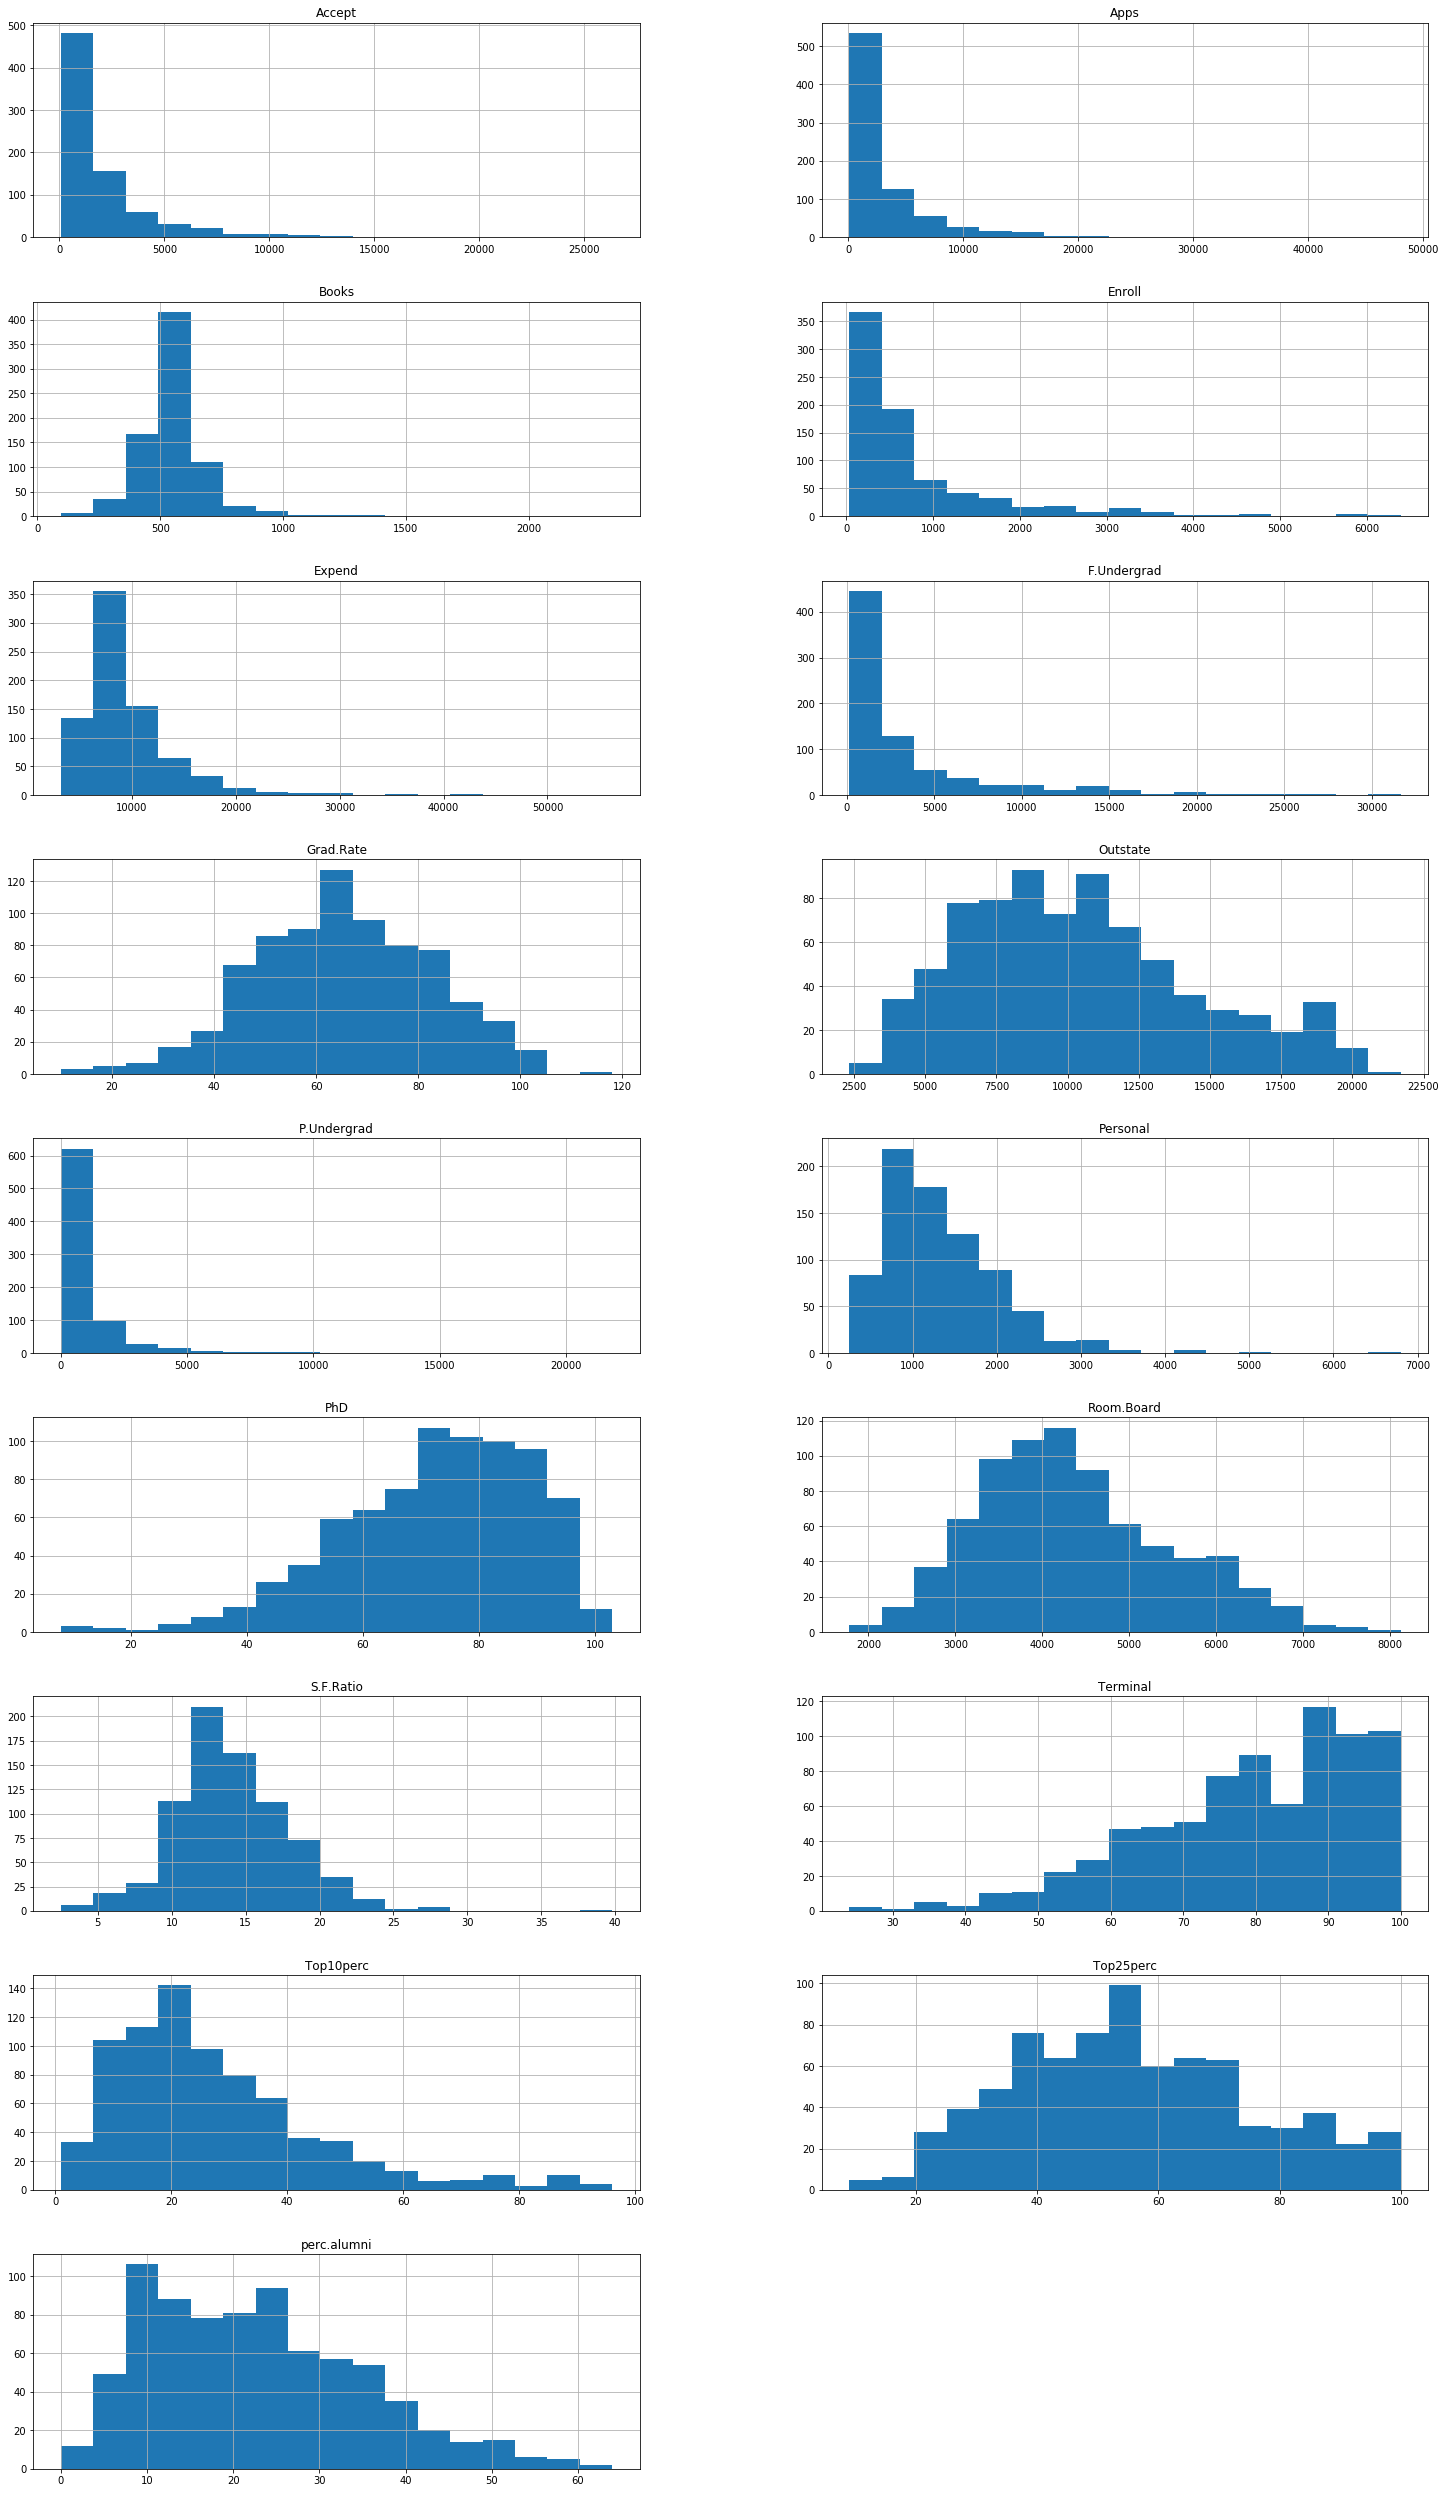

In [12]:
numerical = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']
df[numerical].hist(bins=17, figsize=(25, 45), layout=(9, 2));

#### Checking for outliers: Using a box plot to check the outliers

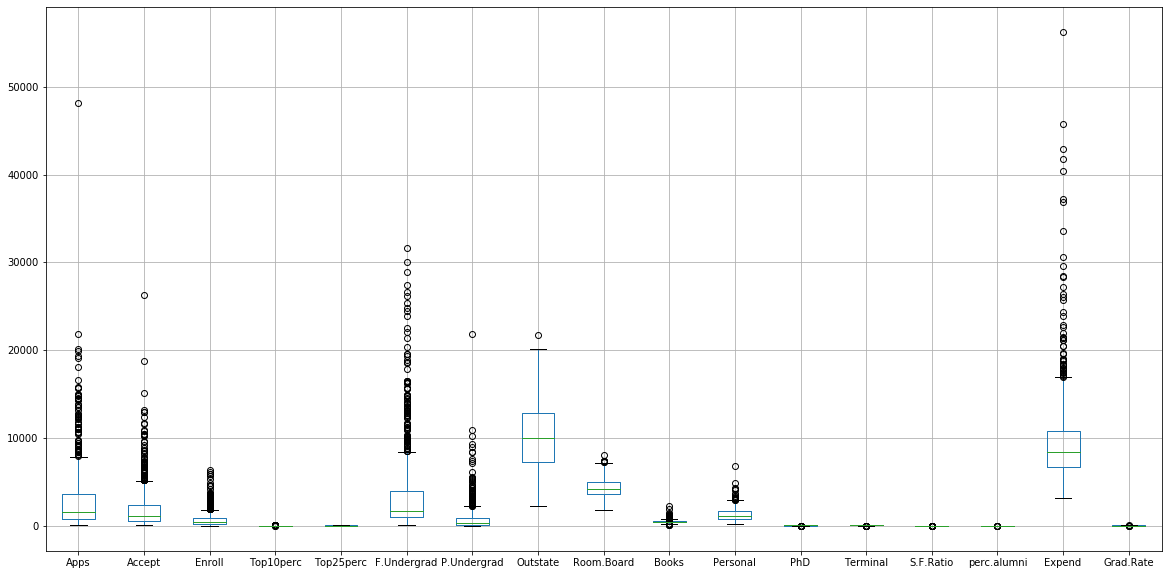

In [13]:
df.boxplot(figsize=(20,10))

Looking at the box plot, it seems that there are outliers in the following variables: 

'Apps', 'Accept', 'Enroll', 'Top10perc','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend','Grad.Rate'

- here we will replace the outlier value using the IQR 
- Creata a user definded function for finding the lower and upper range for a variable to treat the outlier

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    col = np.where(col > upper_range,upper_range,col)
    col = np.where(col < lower_range,lower_range,col)
    return col

In [15]:
df['Apps'] = remove_outlier(df['Apps'])

In [16]:
df['Accept'] = remove_outlier(df['Accept'])

In [17]:
df['Top10perc'] = remove_outlier(df['Top10perc'])

In [18]:
df['F.Undergrad'] = remove_outlier(df['F.Undergrad'])

In [19]:
df['P.Undergrad'] = remove_outlier(df['P.Undergrad'])

In [20]:
df['Outstate'] = remove_outlier(df['Outstate'])

In [21]:
df['Room.Board'] = remove_outlier(df['Room.Board'])

In [22]:
df['Books'] = remove_outlier(df['Books'])

In [23]:
df['Personal'] = remove_outlier(df['Personal'])

In [24]:
df['PhD'] = remove_outlier(df['PhD'])

In [25]:
df['Terminal'] = remove_outlier(df['Terminal'])

In [26]:
df['S.F.Ratio'] = remove_outlier(df['S.F.Ratio'])

In [27]:
df['perc.alumni'] = remove_outlier(df['perc.alumni'])

In [28]:
df['Expend'] = remove_outlier(df['Expend'])

In [29]:
df['Grad.Rate'] = remove_outlier(df['Grad.Rate'])

In [30]:
df['Enroll'] = remove_outlier(df['Enroll'])

In [31]:
df.head()

Names    Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660.0  1232.0   721.0       23.0         52   
1            Adelphi University  2186.0  1924.0   512.0       16.0         29   
2                Adrian College  1428.0  1097.0   336.0       22.0         50   
3           Agnes Scott College   417.0   349.0   137.0       60.0         89   
4     Alaska Pacific University   193.0   146.0    55.0       16.0         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
0       2885.0        537.0    7440.0      3300.0  450.0    2200.0  70.0   
1       2683.0       1227.0   12280.0      6450.0  750.0    1500.0  29.0   
2       1036.0         99.0   11250.0      3750.0  400.0    1165.0  53.0   
3        510.0         63.0   12960.0      5450.0  450.0     875.0  92.0   
4        249.0        869.0    7560.0      4120.0  795.0    1500.0  76.0   

   Terminal  S.F.Ratio  perc.alumni   Expend  Grad.Rate  
0      78.0       18.1         12.0   7041.0       60.0  
1      39.5       12.2         16.0  10527.0       56.0  
2      66.0       12.9         30.0   8735.0       54.0  
3      97.0        7.7         37.0  16948.5       59.0  
4      72.0       11.9          2.0  10922.0       15.5

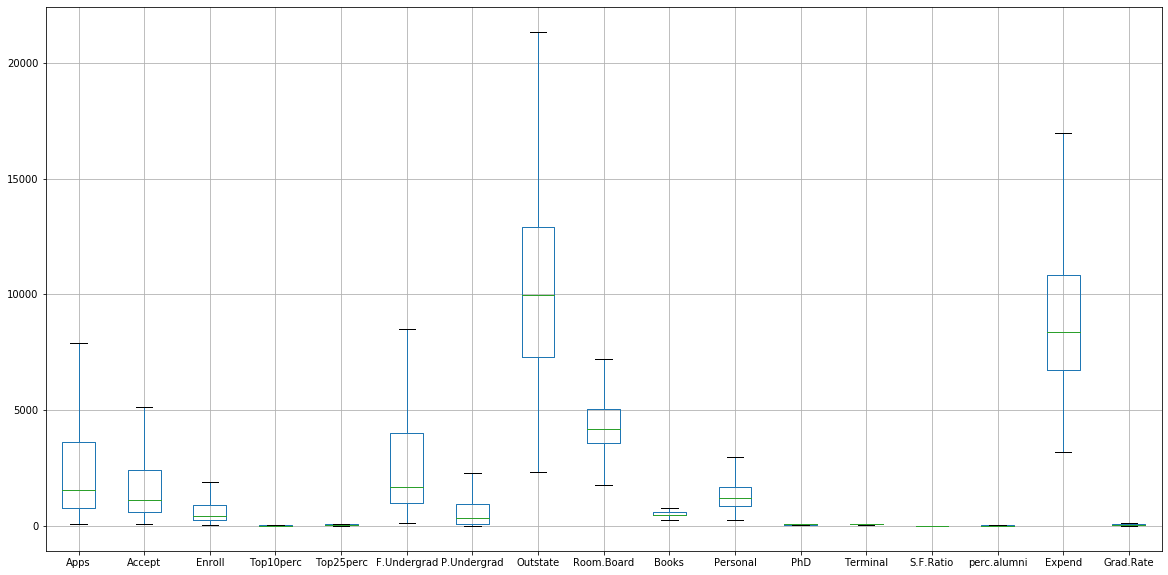

In [32]:
df.boxplot(figsize=(20,10))

In [33]:
df.describe()

Apps       Accept       Enroll   Top10perc   Top25perc  \
count   777.000000   777.000000   777.000000  777.000000  777.000000   
mean   2571.352638  1746.280566   660.388674   26.842986   55.796654   
std    2422.195279  1523.286632   570.126836   15.582539   19.804778   
min      81.000000    72.000000    35.000000    1.000000    9.000000   
25%     776.000000   604.000000   242.000000   15.000000   41.000000   
50%    1558.000000  1110.000000   434.000000   23.000000   54.000000   
75%    3624.000000  2424.000000   902.000000   35.000000   69.000000   
max    7896.000000  5154.000000  1892.000000   65.000000  100.000000   

       F.Undergrad  P.Undergrad      Outstate   Room.Board       Books  \
count   777.000000   777.000000    777.000000   777.000000  777.000000   
mean   2935.648005   655.884170  10440.196268  4355.438224  539.425997   
std    2700.233049   716.274014   4021.712447  1090.666009  115.229712   
min     139.000000     1.000000   2340.000000  1780.000000  275.000000   
25%     992.000000    95.000000   7320.000000  3597.000000  470.000000   
50%    1707.000000   353.000000   9990.000000  4200.000000  500.000000   
75%    4005.000000   967.000000  12925.000000  5050.000000  600.000000   
max    8524.500000  2275.000000  21332.500000  7229.500000  795.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1323.790219   72.774775   79.782497   14.051223    22.722008   
std     609.505876   15.953120   14.473057    3.784212    12.325480   
min     250.000000   27.500000   39.500000    4.000000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    2975.000000  103.000000  100.000000   24.000000    58.000000   

             Expend   Grad.Rate  
count    777.000000  777.000000  
mean    9182.523810   65.468468  
std     3396.496148   17.142538  
min     3186.000000   15.500000  
25%     6751.000000   53.000000  
50%     8377.000000   65.000000  
75%    10830.000000   78.000000  
max    16948.500000  115.500000

#### Outliers are all removed

### Bivariate Analysis --- Pairplot

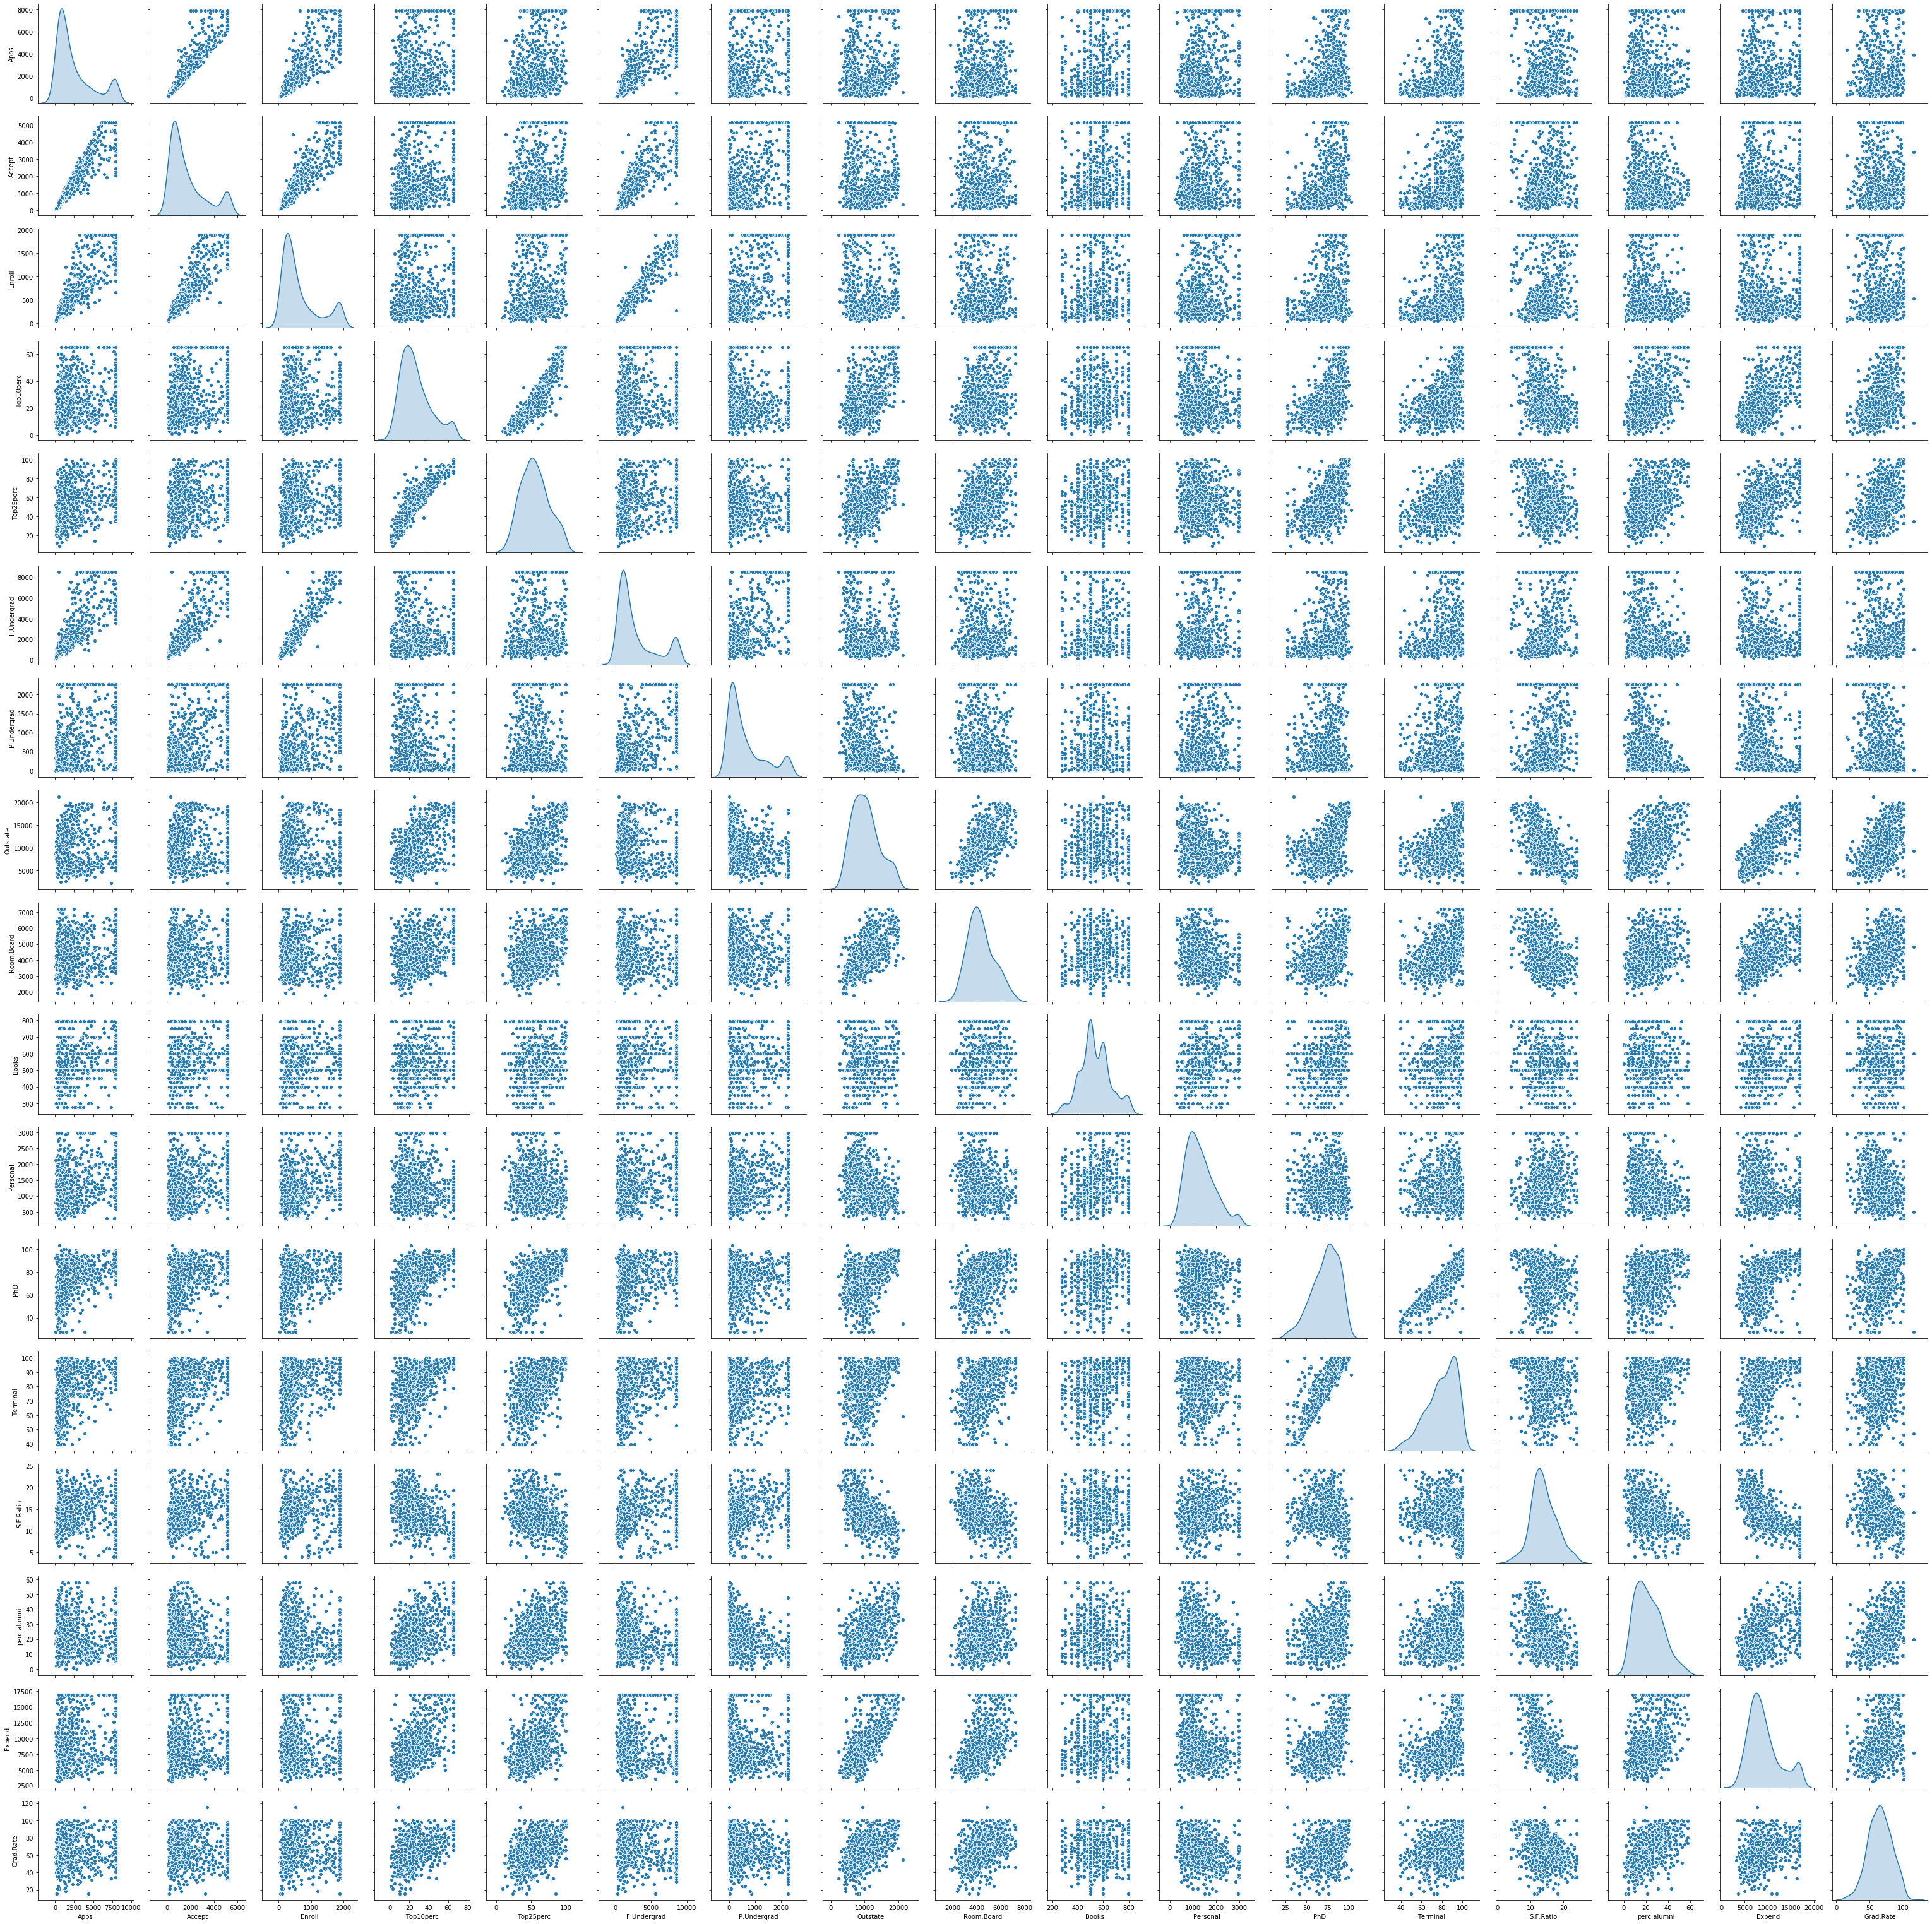

In [48]:
sns.pairplot(df, diag_kind='kde')

In [49]:
df.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

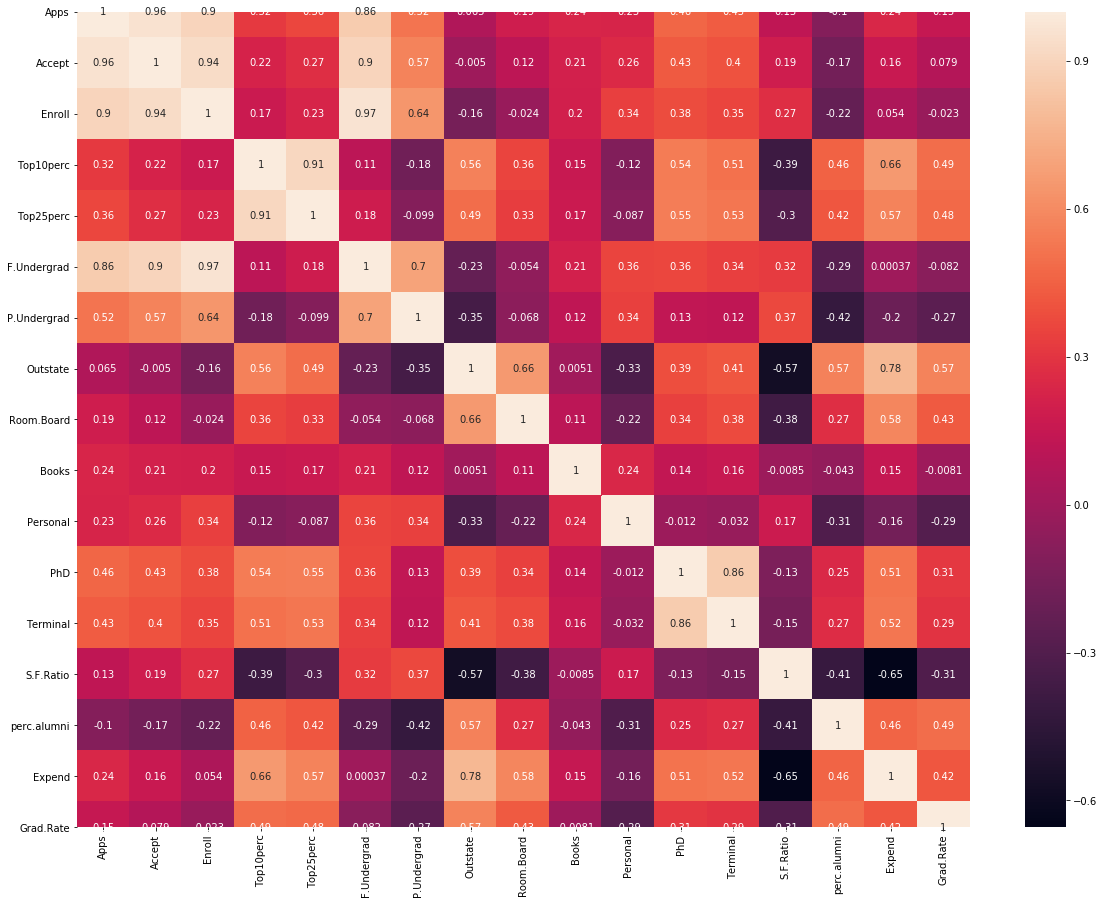

In [50]:
plt.subplots(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)

### Normalizing and Scaling

In [61]:
df_new = df.drop('Names',axis=1)
df_new.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0         52       2885.0        537.0   
1  2186.0  1924.0   512.0       16.0         29       2683.0       1227.0   
2  1428.0  1097.0   336.0       22.0         50       1036.0         99.0   
3   417.0   349.0   137.0       60.0         89        510.0         63.0   
4   193.0   146.0    55.0       16.0         44        249.0        869.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0  450.0    2200.0  70.0      78.0       18.1   
1   12280.0      6450.0  750.0    1500.0  29.0      39.5       12.2   
2   11250.0      3750.0  400.0    1165.0  53.0      66.0       12.9   
3   12960.0      5450.0  450.0     875.0  92.0      97.0        7.7   
4    7560.0      4120.0  795.0    1500.0  76.0      72.0       11.9   

   perc.alumni   Expend  Grad.Rate  
0         12.0   7041.0       60.0  
1         16.0  10527.0       56.0  
2         30.0   8735.0       54.0  
3         37.0  16948.5       59.0  
4          2.0  10922.0       15.5

In [62]:
df_new = df_new.apply(zscore)
df_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

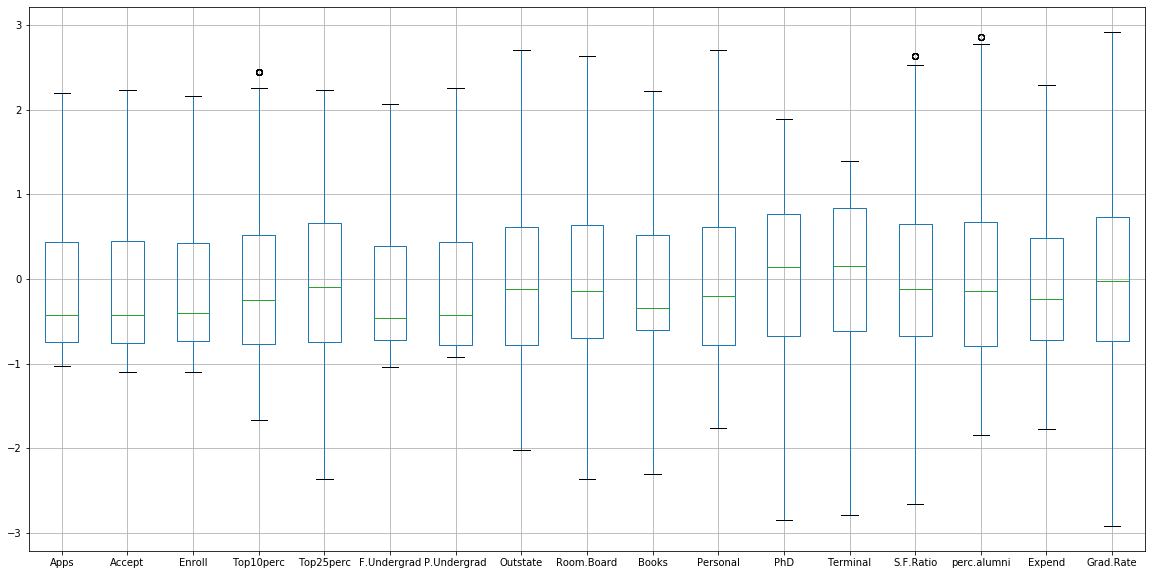

In [71]:
df_new.boxplot(figsize = (20,10))

### Covariance matrix for identifying Principal components

In [74]:
cov_mat = pd.DataFrame.cov(df_new)
cov_mat

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.956538  0.898039   0.321756   0.364961     0.862111   
Accept       0.956538  1.001289  0.936482   0.223586   0.274033     0.898190   
Enroll       0.898039  0.936482  1.001289   0.171977   0.230731     0.968549   
Top10perc    0.321756  0.223586  0.171977   1.001289   0.915053     0.111358   
Top25perc    0.364961  0.274033  0.230731   0.915053   1.001289     0.181429   
F.Undergrad  0.862111  0.898190  0.968549   0.111358   0.181429     1.001289   
P.Undergrad  0.520493  0.573429  0.642422  -0.180241  -0.099423     0.697027   
Outstate     0.065421 -0.005009 -0.155856   0.562884   0.490200    -0.226457   
Room.Board   0.187717  0.119740 -0.023876   0.357826   0.331413    -0.054546   
Books        0.236442  0.208974  0.202317   0.153650   0.169980     0.208147   
Personal     0.230244  0.256676  0.339785  -0.116880  -0.086922     0.360246   
PhD          0.464522  0.427891  0.382031   0.544749   0.552172     0.362030   
Terminal     0.435038  0.403929  0.354836   0.507401   0.528334     0.335486   
S.F.Ratio    0.126574  0.188749  0.274622  -0.388426  -0.297616     0.324922   
perc.alumni -0.101288 -0.165729 -0.223010   0.456384   0.417369    -0.285825   
Expend       0.243248  0.162017  0.054291   0.657886   0.573643     0.000371   
Grad.Rate    0.150998  0.079084 -0.023281   0.494307   0.479602    -0.082345   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.520493  0.065421    0.187717  0.236442  0.230244  0.464522   
Accept          0.573429 -0.005009    0.119740  0.208974  0.256676  0.427891   
Enroll          0.642422 -0.155856   -0.023876  0.202317  0.339785  0.382031   
Top10perc      -0.180241  0.562884    0.357826  0.153650 -0.116880  0.544749   
Top25perc      -0.099423  0.490200    0.331413  0.169980 -0.086922  0.552172   
F.Undergrad     0.697027 -0.226457   -0.054546  0.208147  0.360246  0.362030   
P.Undergrad     1.001289 -0.354673   -0.067725  0.122686  0.344496  0.127827   
Outstate       -0.354673  1.001289    0.656334  0.005117 -0.326029  0.391825   
Room.Board     -0.067725  0.656334    1.001289  0.109065 -0.219837  0.341909   
Books           0.122686  0.005117    0.109065  1.001289  0.240172  0.136566   
Personal        0.344496 -0.326029   -0.219837  0.240172  1.001289 -0.011699   
PhD             0.127827  0.391825    0.341909  0.136566 -0.011699  1.001289   
Terminal        0.122309  0.413110    0.379759  0.159523 -0.032012  0.864040   
S.F.Ratio       0.371085 -0.574422   -0.376915 -0.008547  0.174137 -0.129556   
perc.alumni    -0.419874  0.566465    0.272744 -0.042887 -0.306147  0.249198   
Expend         -0.202189  0.776327    0.581370  0.150177 -0.163481  0.511187   
Grad.Rate      -0.265499  0.573196    0.426339 -0.008061 -0.291269  0.310419   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.435038   0.126574    -0.101288  0.243248   0.150998  
Accept       0.403929   0.188749    -0.165729  0.162017   0.079084  
Enroll       0.354836   0.274622    -0.223010  0.054291  -0.023281  
Top10perc    0.507401  -0.388426     0.456384  0.657886   0.494307  
Top25perc    0.528334  -0.297616     0.417369  0.573643   0.479602  
F.Undergrad  0.335486   0.324922    -0.285825  0.000371  -0.082345  
P.Undergrad  0.122309   0.371085    -0.419874 -0.202189  -0.265499  
Outstate     0.413110  -0.574422     0.566465  0.776327   0.573196  
Room.Board   0.379759  -0.376915     0.272744  0.581370   0.426339  
Books        0.159523  -0.008547    -0.042887  0.150177  -0.008061  
Personal    -0.032012   0.174137    -0.306147 -0.163481  -0.291269  
PhD          0.864040  -0.129556     0.249198  0.511187   0.310419  
Terminal     1.001289  -0.151188     0.266375  0.524744   0.293180  
S.F.Ratio   -0.151188   1.001289    -0.412632 -0.655220  -0.308922  
perc.alumni  0.266375  -0.412632     1.001289  0.463519   0.492041  
Expend       0.524744  -0.65522

In [75]:
cov_matrix = np.cov(df_new.T)
cov_matrix

array([[ 1.00128866e+00,  9.56537704e-01,  8.98039052e-01,
         3.21756324e-01,  3.64960691e-01,  8.62111140e-01,
         5.20492952e-01,  6.54209711e-02,  1.87717056e-01,
         2.36441941e-01,  2.30243993e-01,  4.64521757e-01,
         4.35037784e-01,  1.26573895e-01, -1.01288006e-01,
         2.43248206e-01,  1.50997775e-01],
       [ 9.56537704e-01,  1.00128866e+00,  9.36482483e-01,
         2.23586208e-01,  2.74033187e-01,  8.98189799e-01,
         5.73428908e-01, -5.00874847e-03,  1.19740419e-01,
         2.08974091e-01,  2.56676290e-01,  4.27891234e-01,
         4.03929238e-01,  1.88748711e-01, -1.65728801e-01,
         1.62016688e-01,  7.90839722e-02],
       [ 8.98039052e-01,  9.36482483e-01,  1.00128866e+00,
         1.71977357e-01,  2.30730728e-01,  9.68548601e-01,
         6.42421828e-01, -1.55856056e-01, -2.38762560e-02,
         2.02317274e-01,  3.39785395e-01,  3.82031198e-01,
         3.54835877e-01,  2.74622251e-01, -2.23009677e-01,
         5.42906862e-02, -2.3

In [76]:
df_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [77]:
eig_vals,eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n Eigen Vectores \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]

 Eigen Vectores 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2

Eigen Values Greater than 1: 4

### Cumulative Distribution of Eigen values

In [78]:
tot = sum(eig_vals)
var_exp = [(i/tot) for i in sorted(eig_vals,reverse = True)]
var_exp

[0.3326608366671334,
 0.2875534500817077,
 0.06617163554717721,
 0.05898143957623828,
 0.0512389267233915,
 0.04498638671547022,
 0.03436242655665819,
 0.031988471732052014,
 0.024881075492912633,
 0.02238396454242056,
 0.014511567777537853,
 0.00865143448811295,
 0.007892466165436483,
 0.005806273152471963,
 0.004387876862118951,
 0.0022261871681452747,
 0.0013155807510148384]

In [79]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.33266084, 0.62021429, 0.68638592, 0.74536736, 0.79660629,
       0.84159268, 0.8759551 , 0.90794357, 0.93282465, 0.95520861,
       0.96972018, 0.97837162, 0.98626408, 0.99207036, 0.99645823,
       0.99868442, 1.        ])

### Scree plot

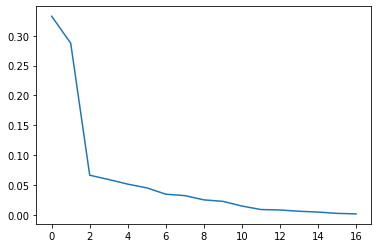

In [80]:
plt.plot(var_exp)

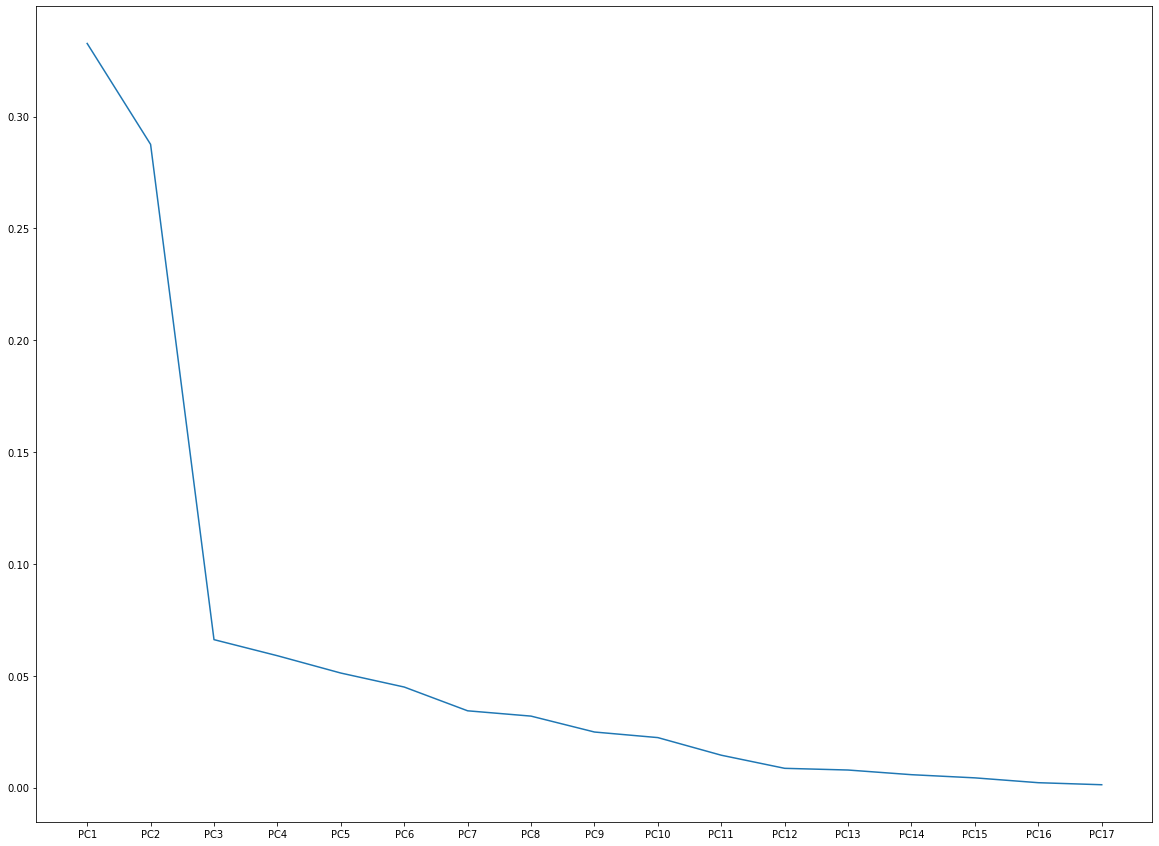

In [81]:
tick_label = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']
plt.subplots(figsize=(20,15))
plt.plot(tick_label,var_exp)

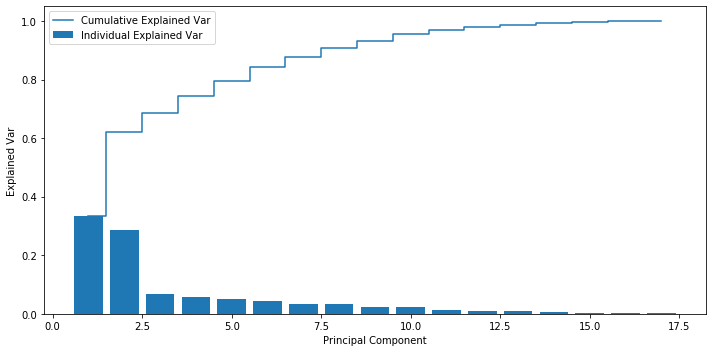

In [83]:
tick_label = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']
plt.figure(figsize = (10,5))
plt.bar(range(1,eig_vals.size+1),var_exp,align='center',label='Individual Explained Var')
plt.step(range(1,eig_vals.size+1),cum_var_exp,where='mid',label = 'Cumulative Explained Var')
plt.ylabel('Explained Var')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.tight_layout()

### Finding Principal Components

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
data_reduced = pca.fit_transform(df_new)
data_reduced.T

array([[-1.60249937, -1.80467544, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041498, -1.38279212, ...,  0.01779846,
        -1.18493013,  1.04394672],
       [ 0.03004479,  2.12212683, -0.50151233, ...,  0.32216026,
         1.32596389, -1.42543816],
       [-1.00842203,  3.13891162, -0.03636762, ..., -0.58727251,
         0.07769608, -1.30027004]])

In [86]:
pca.components_

array([[ 0.26217154,  0.23056246,  0.1892764 ,  0.33887452,  0.33469053,
         0.16329301,  0.02247971,  0.28354729,  0.24418659,  0.09670828,
        -0.03522996,  0.3264107 ,  0.32311598, -0.16315164,  0.18661083,
         0.32895585,  0.23882245],
       [ 0.31413626,  0.34462358,  0.38281332, -0.09931917, -0.0595055 ,
         0.39863637,  0.35755005, -0.25186362, -0.13190912,  0.09397395,
         0.23243959,  0.05513902,  0.0430332 ,  0.25980456, -0.25709255,
        -0.16000895, -0.16752366],
       [-0.08101775, -0.10765859, -0.08552969,  0.07882924,  0.05079395,
        -0.0737078 , -0.04035688, -0.0149395 ,  0.02113792,  0.69712113,
         0.53097281, -0.08111338, -0.05897863, -0.27415065, -0.10371589,
         0.18420573, -0.24533583],
       [ 0.09877631,  0.11814059,  0.00930673, -0.36912006, -0.41681987,
         0.01395046,  0.22535083,  0.26297484,  0.58089404, -0.03615637,
        -0.11498298, -0.14726001, -0.0890091 , -0.259486  , -0.22398244,
         0.21375758

In [87]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144])

In [88]:
var = np.cumsum(np.round(pca.explained_variance_ratio_,3))*100
var

array([33.3, 62.1, 68.7, 74.6])

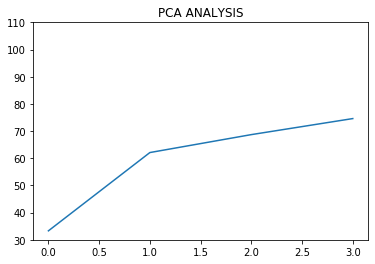

In [89]:
plt.title('PCA ANALYSIS')
plt.ylim(30,110)
plt.plot(var)
#plt.ylabel('% Var Explained')
#plt.xlabel('PC')

### Correlation between components and features

In [91]:
df_comp = pd.DataFrame(pca.components_,columns = list(df_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118141  0.009307  -0.369120  -0.416820     0.013950   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147260 -0.089009   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213758  -0.036191

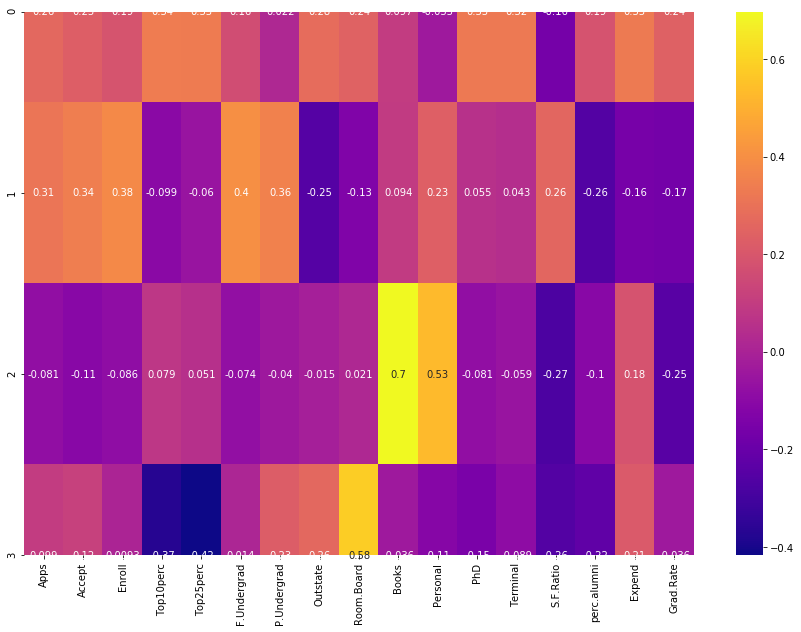

In [93]:
plt.figure(figsize = (15,10))
sns.heatmap(df_comp,cmap = 'plasma',annot=True)